#  Sushi, Falafel and Ideology 

# 1. Introduction

Sushi made its way to Israel about 30 years ago and quickly gained popularity among the bourgeois society. Being quite expensive, it became a symbol to luxurious food consumed by upper class; and frequently associated with left wing views. Falafel, on the other hand, has always been here. It is considered the Israeli national food and it is filling and very affordable. 
  
  
In this capstone project exercise I exploit the data from Foursquare in order to explore the association between the demand to these two very different food options and ideology. Our working assumptions include (1) that some degree of spatial equilibrium exists such that businesses are more likely to open where there is higher demand for their services, and (2) that the demand is local by some extent. Aside to the spatial data from Foursquare, I further use the latest election result data from the 2019 Israeli elections. 

# 2. Data: Description and Preparation 

## 2.1 Election Data at the Pole level

We wish to associate election data with proximity to a sushi place or a falafel stand. We are equipped with official election data, which are specified for each “statistical area” (which is the Israeli equivalent to a census tract, the smallest spatial unit surveyed by the Central Bureau of Statistics, hereafter “CBS”). The complete csv file with the election results can be found here: https://votes21.bechirot.gov.il/ballotresults. 

In [73]:
import pandas as pd
 
electdf=pd.read_csv('https://media21.bechirot.gov.il/files/expb.csv', index_col=0, encoding = 'iso8859_8')
electdf.head()

,סמל ישוב,מספר קלפי,בזב,מצביעים,פסולים,כשרים,אמת,ג,דעם,ום,...,צק,ץ,ץז,ץי,ק,קי,קן,קף,ר,שס
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבו ג'ווייעד (שבט),967,1.0,546,64,2,62,2,0,31,7,...,0,0,0,0,0,0,1,0,0,0
אבו ג'ווייעד (שבט),967,2.0,739,113,2,111,2,0,69,5,...,0,0,0,0,0,2,0,0,0,0
אבו ג'ווייעד (שבט),967,3.0,630,98,1,97,1,0,75,1,...,0,0,0,0,0,0,0,0,0,0
אבו גוש,472,1.0,518,197,6,191,4,0,36,50,...,0,1,0,0,1,0,0,0,0,1
אבו גוש,472,2.0,679,290,3,287,7,0,69,85,...,0,0,0,0,0,0,0,1,0,2


What we see here is the description of each pole (=each statistical area), including the name of the locality, the administrative code of the locality, the administrative code of the pole, and then some statistics (including the number of potential voters for each pole, the number of actual votes and the number of unfit votes) and finally the complete distribution of votes within each statistical area (row). 
We add together parties that virtually share ideology, and for normalization we use the share of votes for each group of parties rather than the nominal votes. 

In [74]:
electdf=electdf.rename(columns={'סמל ישוב':'citycode'})
electdf=electdf.rename(columns={'מספר קלפי':'statarea'})
electdf=electdf.rename(columns={'מחל':'Likud'})
electdf=electdf.rename(columns={'פה':'KaholLavan'})
electdf=electdf.rename(columns={'שס':'Shas'})
electdf=electdf.rename(columns={'ג':'YTora'})
electdf=electdf.rename(columns={'ום':'Hadash'})
electdf=electdf.rename(columns={'אמת':'HaAvoda'})
electdf=electdf.rename(columns={'ל':'IBetenu'})
electdf=electdf.rename(columns={'טב':'Yamin'})
electdf=electdf.rename(columns={'מרצ':'Meretz'})
electdf=electdf.rename(columns={'כ':'Kulanu'})
electdf=electdf.rename(columns={'דעם':'RBalad'})
electdf=electdf.rename(columns={'נ':'YHadash'})

electdf=electdf.rename(columns={'כשרים':'voters'})

electdf['Left']=(electdf.Meretz+electdf.HaAvoda)/electdf.voters
electdf['Center']=(electdf.KaholLavan)/electdf.voters
electdf['Right']=(electdf.Likud+electdf.Kulanu+electdf.IBetenu)/electdf.voters
electdf['National']=(electdf.Yamin+electdf.YHadash)/electdf.voters
electdf['Arab']=(electdf.RBalad+electdf.Hadash)/electdf.voters
electdf['UltOrthodox']=(electdf.Shas+electdf.YTora)/electdf.voters

electdf=electdf.rename(columns={'כשרים':'voters'})
keep=['citycode', 'statarea', 'Left', 'Center', 'Right', 'National', 'Arab' , 'UltOrthodox', 'voters']
electdf=electdf[keep]
electdf.head()

,citycode,statarea,Left,Center,Right,National,Arab,UltOrthodox,voters
שם ישוב,,,,,,,,,
אבו ג'ווייעד (שבט),967,1.0,0.096774,0.241935,0.000000,0.000000,0.612903,0.000000,62
אבו ג'ווייעד (שבט),967,2.0,0.045045,0.180180,0.027027,0.027027,0.666667,0.000000,111
אבו ג'ווייעד (שבט),967,3.0,0.041237,0.154639,0.000000,0.000000,0.783505,0.000000,97
אבו גוש,472,1.0,0.251309,0.151832,0.115183,0.005236,0.450262,0.005236,191
אבו גוש,472,2.0,0.236934,0.139373,0.059233,0.006969,0.536585,0.006969,287


In [82]:
electdf.describe()

,citycode,statarea,Left,Center,Right,National,Arab,UltOrthodox,voters
count,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000
mean,7055.333024,122.331352,0.081869,0.252090,0.343883,0.065341,0.095697,0.108926,400.303762
std,16158.138727,193.163319,0.084598,0.188118,0.218376,0.105873,0.251056,0.208565,126.763832
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1200.000000,8.000000,0.024752,0.093137,0.153488,0.020649,0.000000,0.010753,324.000000
50%,4000.000000,39.000000,0.054545,0.219355,0.347826,0.038023,0.000000,0.036866,396.000000
75%,7400.000000,153.000000,0.110656,0.403125,0.534591,0.066372,0.007772,0.093458,469.000000
max,99999.000000,994.000000,0.792123,0.754839,0.886503,0.961783,1.000000,1.000000,1033.000000


We can see that on average (across pole, not weigted by number of voters), in the average statisttical area 8.2% of votes went to leftwing parties, 25% to the center, 34% to right wing parties, 6.5% to (religious) national parties, and almost 10% to arab parties.Finally, we see that on average 400 people voted in each statistical area, with a median also close to 400. later I will drop poles with less than 300 voters.      

## 2.2 Geocoding

To get the central coordinates of each statistical area I turn to the SHP file provided by the CBS that contains the statistical area polygons. as an aproximation to the centroid of each statistical area I use the mean coordinates of the polygon points. That of course is not accurate, but seems reasonable for relatively symetric polygons. (the shp files can be downloaded from www.data.gov.il).

In [76]:
sa_center_path='c:\\Research\\Databases\\shp files\\SAs\\average x y SAs polygons.csv'
sadf=pd.read_csv(sa_center_path, index_col=0)
sadf.head()

,_X,_Y,sa_id,OBJECTID,SEMEL_YISH,STAT08,YISHUV_STA,Shem_Yis_1,Shape_Leng,Shape_Area
_ID,,,,,,,,,,
1,215275.551238,727858.153125,1,1,-2,0,0,NaN,724681.8800,4.622823e+08
2,174053.640065,614305.807668,2,2,7,1,70001,SHAHAR,11591.4670,6.802526e+06
3,189331.387874,628677.177597,3,3,10,1,100001,TIROSH,2981.4653,4.445150e+05
4,173435.339793,612136.421822,4,4,11,1,110001,NIR HEN,11808.3580,5.983378e+06
5,226287.155326,520252.822160,5,5,13,1,130001,HAZEVA,17954.5800,1.780427e+07


It turns out, however, that these are provided in a local system (ITM) - see _X and _Y variables. Some non-linear conversion is needed before I can pass them to make a Foursquare api call. To overcome this issue, I wrote functions that converts ITM to the global system and vice-versa, and functions that do the same for values stores in DataFrame columns.  

In [77]:
"""
This code includes a function that analiticaly converts world coordinates (lng, lat)  to ITM coordinates (x, y) and another function that iteratively converts world coordinates to ITM 
Notes: the accuracy is far from perfect, with about 20 meters error in Haifa, for example. Good enough for my purposes.
       accuracy increases as you get closer to x0,y0 (close to Jerusalem) 
"""
def GEOtoITM (lng, lat):
    import math   
     #אליפסואיד GRS80
    a_grs80=6378137
    e2_grs80=0.006694380021

    
    #הערכים הגיאוגרפיים של הנקודה הראשית
    #phi0=31 44' 03''.817
    phi0_malot=31
    phi0_dakot=44
    phi0_shniot=3.817
    
    phi0=phi0_malot+phi0_dakot/60+phi0_shniot/3600
    
    #lambda=35 12' 16''.261*/
    lambda0_malot=35
    lambda0_dakot=12
    lambda0_shniot=16.261
    
    lambda0=lambda0_malot+lambda0_dakot/60+lambda0_shniot/3600
    	
    #הערכים יישרי הזוית של הנקודה הראשית
    x0=219529.584 #/*E0*/
    y0=626907.390 #/*N0*/

    # מקדם קנה המידה על המרידיאן המרכזי
    m0=1.0000067

#לפי משוואות המיפוי מרקטור רוחבי לחישוב קורדינטות מישוריות מקורדינטות גיאוגרפיות
    """
    y=y0+m0NJ(1+D2+D3)
    x=x0+(Sm-Sm0)+m0N(J^2)t(1+C2+C3)/2 
    
        כאשר
    
    N=a_grs80/sqrt(1-e^2_grs80*sin^2phi)
    J=(lambda-lambda0)cos(phi)
    D2=J^2 
    """
    CA=1.005052500
    CB=0.002531553
    CC=0.000002657
    CD=0.000000003
    Sm0=3512424.3388
    
    Sm=m0*a_grs80*(1-e2_grs80)*(CA*lat*math.pi/180-CB*math.sin(2*lat*math.pi/180)+CC*math.sin(4*lat*math.pi/180)-CD*math.sin(6*lat*math.pi/180))
    t=math.tan(lat*math.pi/180)
    niu2=e2_grs80*(math.cos(lat*math.pi/180)**2)/(1-e2_grs80)
    N=a_grs80/((1-e2_grs80*(math.sin(lat*math.pi/180)**2))**(0.5))
    J=(lng-lambda0)*math.pi/180*math.cos(lat*math.pi/180)
    D2=(J**2)*(1-(t**2)+niu2)/6
    D3=(J**4)*(5-18*(t**2)+14*niu2+(t**4)-58*(t**2)*niu2)/120
    C2=(J**2)*(5-(t**2)+9*niu2+4*(niu2**2))/12
    C3=(J**4)*(61-58*(t**2)+270*niu2+(t**4)-330*(t**2)*niu2)/360
    
    x=x0+m0*N*J*(1+D2+D3)
    y=y0+(Sm-Sm0)+m0*N*(J**2)*t*(1+C2+C3)/2
    ret=[x,y]
    return (ret)

""""
In the following function I find iteratively the world coordinates, using the function GEOtoITM
"""
def ITMtoGEO(x,y,thresh=10):

    lat_i=32.0
    lng_i=35.0
    
    dist=3*thresh    
    while dist>thresh:
        a=GEOtoITM(lat=lat_i, lng=lng_i)
        
        dist_x=a[0]-x
        dist_y=a[1]-y
        dist=((dist_x**2)+(dist_y**2))**(0.5)
        lng_i=lng_i-(dist_x/100000)
        lat_i=lat_i-(dist_y/100000)
        #print("DX: ", dist_x)
    ret=[lng_i,lat_i]
    return (ret)        

import pandas as pd

#example
#import pandas as pd
#lonlatpath="C:\\Courses\\IBM Data Science\\9 Capstone\\LongLatDF.csv"
#lonlatdf=pd.read_csv(lonlatpath, index_col=0)
    
def df_GEOtoITM (dfname, lng_col, lat_col, newXname, newYname):
    df_temp=dfname
    df_temp[newXname]=0.0
    df_temp[newYname]=0.0
    for i in range(df_temp.shape[0]):
        lat_i=df_temp[lat_col].iloc[i]
        lon_i=df_temp[lng_col].iloc[i]
        temp_i=GEOtoITM(lng=lon_i, lat=lat_i)
        df_temp[newXname].iloc[i]=temp_i[0]
        df_temp[newYname].iloc[i]=temp_i[1]
    return df_temp

#example
#df2=df_GEOtoITM (dfname=lonlatdf, lng_col="Lon", lat_col="Lat", newXname="x", newYname="y")

def df_ITMtoGEO (dfname, x_col, y_col, newLNGname, newLATname, thresh=10):
    df_temp=dfname
    df_temp[newLNGname]=0.0
    df_temp[newLATname]=0.0
    for i in range(df_temp.shape[0]):
        x_i=df_temp[x_col].iloc[i]
        y_i=df_temp[y_col].iloc[i]
        temp_i=ITMtoGEO(x=x_i, y=y_i, thresh=thresh)
        df_temp[newLNGname].iloc[i]=temp_i[0]
        df_temp[newLATname].iloc[i]=temp_i[1]
    return df_temp
#example
#df3=df_ITMtoGEO (dfname=df2, x_col="x", y_col="y", newLNGname="LNG2", newLATname="LAT2")


And use the functions defined above to convert the local x and y to the global longitude and latitude:

In [78]:
sadf2=df_ITMtoGEO (dfname=sadf, x_col="_X", y_col="_Y", newLNGname="lng", newLATname="lat")
sadf2.head()

,_X,_Y,sa_id,OBJECTID,SEMEL_YISH,STAT08,YISHUV_STA,Shem_Yis_1,Shape_Leng,Shape_Area,lng,lat
_ID,,,,,,,,,,,,
1,215275.551238,727858.153125,1,1,-2,0,0,NaN,724681.8800,4.622823e+08,35.159178,32.644746
2,174053.640065,614305.807668,2,2,7,1,70001,SHAHAR,11591.4670,6.802526e+06,34.725228,31.619840
3,189331.387874,628677.177597,3,3,10,1,100001,TIROSH,2981.4653,4.445150e+05,34.885801,31.749952
4,173435.339793,612136.421822,4,4,11,1,110001,NIR HEN,11808.3580,5.983378e+06,34.718813,31.600251
5,226287.155326,520252.822160,5,5,13,1,130001,HAZEVA,17954.5800,1.780427e+07,35.275106,30.772438


Notice the "lat" and "lng" vaiables added to the dataframe in this procedure.   
Now I'll merge them with the election results dataframe     

In [80]:
electdf['statarea']=electdf['statarea'].astype(int)
sadf2=sadf2[['lat','lng','Shem_Yis_1','STAT08','SEMEL_YISH']]
df=pd.merge(left=electdf, right=sadf2, how='inner', left_on=['citycode','statarea'], right_on=['SEMEL_YISH','STAT08'])
df.drop(['STAT08','SEMEL_YISH'],axis=1, inplace=True)
df.head()

,citycode,statarea,Left,Center,Right,National,Arab,UltOrthodox,voters,lat,lng,Shem_Yis_1
0,472,1,0.251309,0.151832,0.115183,0.005236,0.450262,0.005236,191,31.807726,35.106707,ABU GHOSH
1,473,1,0.054348,0.051630,0.122283,0.002717,0.736413,0.010870,368,32.963711,35.173217,ABU SINAN
2,473,2,0.051630,0.038043,0.057065,0.000000,0.834239,0.002717,368,32.957555,35.168131,ABU SINAN
3,473,3,0.056000,0.189333,0.232000,0.000000,0.437333,0.010667,375,32.962040,35.155460,ABU SINAN
4,1342,1,0.071770,0.373206,0.014354,0.014354,0.507177,0.009569,209,31.142191,34.967151,ABU QUREINAT


In [83]:
df=df[df.voters>299]
df.head()

,citycode,statarea,Left,Center,Right,National,Arab,UltOrthodox,voters,lat,lng,Shem_Yis_1
1,473,1,0.054348,0.051630,0.122283,0.002717,0.736413,0.010870,368,32.963711,35.173217,ABU SINAN
2,473,2,0.051630,0.038043,0.057065,0.000000,0.834239,0.002717,368,32.957555,35.168131,ABU SINAN
3,473,3,0.056000,0.189333,0.232000,0.000000,0.437333,0.010667,375,32.962040,35.155460,ABU SINAN
7,679,1,0.173171,0.514634,0.226829,0.024390,0.004878,0.002439,410,32.537087,34.992192,AVI'EL
9,819,1,0.140562,0.644578,0.104418,0.044177,0.000000,0.010040,498,31.706742,34.737359,AVIGEDOR


## 2.3 Foursquare Data 

This is partially a part of the method, but now I want to characterize every statistical area by some proxy of the access to sushi places and falafel stands. I therefor use the Foursquare API using a query of either “falafel” or “sushi”, and the coordinates of each statistical area. I let the radius and the limit to be high (10km, 100) and then weight each of this venues by the distance to the center of the statistical area. This procedure is common in urban economics, and used in what is called "gravity models". That allow me to have a single and continuous indicator for each of my venues of interest.    

In [ ]:

import requests
import pandas as pd
import numpy as np
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules

#Foursquares
CLIENT_ID = '1SXOLKYVC2R3TB32TT5Q2MNIHVXYVXYS0USOANDBQ22QQH40' # my Foursquare ID
CLIENT_SECRET = 'KWKQVZQACOIWYAIHL1ZKDAO2GUNEEDTTEWCOR4FUCK2ZLVV5' # my Foursquare Secret
VERSION = '20190626' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT=100
RADIUS=10000

"""

lat_i=32.0243
lng_i=34.8611

query="Sushi"
url = 'https://api.foursquare.com/v2/venues/explore?&query={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            query,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat_i, 
            lng_i, 
            RADIUS, 
            LIMIT) 
results = requests.get(url).json()
results = requests.get(url).json()["response"]['groups'][0]['items']
"""

def getNearbyVenuesByCat(names, latitudes, longitudes, radius=500, query=""):
 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&query={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            query,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            pass
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['SA','SA Latitude','SA Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
    
    return(nearby_venues)
    
    

Falafel = getNearbyVenuesByCat(names=df.index,
                                   latitudes=df['lat'],
                                   longitudes=df['lng'],
                                   radius=RADIUS,
                                   query="falafel"
                                  )
Falafel.to_csv("Falafel.csv")
                            
Sushi = getNearbyVenuesByCat(names=df.index,
                                   latitudes=df['lat'],
                                   longitudes=df['lng'],
                                   radius=RADIUS,
                                   query="sushi"
                                  )

Sushi.to_csv("Sushi.csv")



Lets calculate the gravity values and take a look again at our main dataframe - df. The data for each statistical area include (1) its coordinates (2) election data (3) proxies for access to falafel and to sushi. This is sufficient to move on to the method section.     

In [95]:

def calcgravity(dataf, lat_i='SA Latitude', lng_i='SA Longitude', lat_j='Venue Latitude', lng_j='Venue Longitude', indexVar='SA', betta=1):
    temp=dataf.copy()    
    temp['distance']=(((temp[lat_i]-temp[lat_j])**2)+((temp[lng_i]-temp[lng_j])**2))**(0.5) 
    temp['gravity']=1/((temp['distance'])**betta)
    return (temp.groupby(indexVar).sum()['gravity'])

Fal=calcgravity(Falafel)
Sush=calcgravity(Sushi)

df['gravity']=0
df.update(Sush)
df=df.rename(columns={'gravity':'SushiGravity'})

df['gravity']=0
df.update(Fal)
df=df.rename(columns={'gravity':'FalafelGravity'})

df[['citycode','statarea','FalafelGravity','SushiGravity']].head()

,citycode,statarea,FalafelGravity,SushiGravity
1,473,1,0.000000,11.353565
2,473,2,0.000000,11.503648
3,473,3,0.000000,13.516351
7,679,1,18.785532,40.851384
9,819,1,0.000000,0.000000


In [ ]:
df.describe()

# 3.Method and Results

As the purpose is to associate ideology with sushi and falafel, we need first to define a proxy for ideology. We can simply use the share of voters to left wing parties, yet this proxy ignores the distribution of votes to other parties in the same pole. Another approach can be to “let the data talk”. Namely, use a clustering procedure to identify typologies of votes distributions. Then, examine each of them, see if it makes sense, and which of them fits best to proxy a “lefty” area. The second step would be to check if there is an association between ideology to sushi and falafel. I will use both a graph and a logit regression and see if such association exist. In doing so, and since I look only for association, I ignore other possible explanations (such as different socioeconomic status and so on). 

## 3.1 Clustering

The code below cluster statistical areas by ideology via k-means. 

In [86]:
from sklearn.cluster import KMeans
kclusters = 5

election_clustering = df[['Left', 'Center', 'Right', 'National', 'Arab' , 'UltOrthodox']]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(election_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

df['Cluster']=kmeans.labels_
df.head()

,citycode,statarea,Left,Center,Right,National,Arab,UltOrthodox,voters,lat,lng,Shem_Yis_1,Cluster
1,473,1,0.054348,0.051630,0.122283,0.002717,0.736413,0.010870,368,32.963711,35.173217,ABU SINAN,3
2,473,2,0.051630,0.038043,0.057065,0.000000,0.834239,0.002717,368,32.957555,35.168131,ABU SINAN,3
3,473,3,0.056000,0.189333,0.232000,0.000000,0.437333,0.010667,375,32.962040,35.155460,ABU SINAN,3
7,679,1,0.173171,0.514634,0.226829,0.024390,0.004878,0.002439,410,32.537087,34.992192,AVI'EL,0
9,819,1,0.140562,0.644578,0.104418,0.044177,0.000000,0.010040,498,31.706742,34.737359,AVIGEDOR,0


Now lets explore the results. lets find the average share of voters for each group of political parties in each cluster.

In [87]:
df.groupby('Cluster')[['Left', 'Center', 'Right', 'National', 'Arab' , 'UltOrthodox']].mean()

,Left,Center,Right,National,Arab,UltOrthodox
Cluster,,,,,,
0,0.200208,0.502759,0.188760,0.037760,0.007167,0.012563
1,0.041397,0.175755,0.535540,0.077297,0.007590,0.100717
2,0.001786,0.007715,0.069204,0.059082,0.000310,0.847325
3,0.090549,0.040518,0.037128,0.002478,0.786815,0.016380
4,0.014358,0.045298,0.202777,0.618009,0.000314,0.042596


These results can be easily interpreted: cluster 0 includes more leftwing areas; 1 - right wing; 2 – ultra orthodox; 3 – Arab; and 4 – more religious-national population. We will focus on cluster 0. 

Lets also look at this clusters placed on a map. We'll use folium

In [88]:

# map of clusters
import folium
from folium import plugins
## center map in the middle of points center in
middle_lat = df['lat'].median()
middle_lon = df['lng'].median()

df['marker_color']='black'
df['marker_color'].loc[df.Cluster==0]='red'
df['marker_color'].loc[df.Cluster==1]='blue'
df['marker_color'].loc[df.Cluster==3]='green'
df['marker_color'].loc[df.Cluster==4]='orange'


df['marker_color'].value_counts()
df.head()
cluster_map = folium.Map(location=[middle_lat, middle_lon], zoom_start=11)

# add points to map
for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=row['voters']/100,
                        #popup=row['name'],
                        color=row['marker_color'],
                        ).add_to(cluster_map)
#cluster_map.save(outfile="ElectionClusters.html")        
cluster_map

C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 3.2 Estimation and Graphic Inspection  

a Logit procedure: the left-hand side variable, y, equals 1 if cluster==0 (leftwing); the independent variables, Xs, are the proxies for access to sushi places and falafel stands. 

In [96]:
import statsmodels.api as sm

dflogit=df.copy()
dflogit['y']=0
dflogit['y'].loc[dflogit.Cluster==0]=1
y=dflogit['y']

X=dflogit[['SushiGravity','FalafelGravity']]

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())



Optimization terminated successfully.
         Current function value: 0.684857
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.017   
Dependent Variable: y                AIC:              2409.2170
Date:               2019-06-27 10:58 BIC:              2420.1586
No. Observations:   1756             Log-Likelihood:   -1202.6  
Df Model:           1                LL-Null:          -1182.5  
Df Residuals:       1754             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
SushiGravity      0.0006   0.0001  4.2993 0.0000  0.0003  0.0008
FalafelGravity   -0.0003   0.0001 -2.9394 0.0033 -0.0005 -0.0001



C:\Users\rgolan\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


It can be easily seen that increased access to sushi is associated with an increased likelihood of that area to be “lefty”, while an increased access to falafel is associated with a decreased level of that likelihood. These results are in line with our original hypothesis. Both found to be statistically significant explanatory variables. 

Now we will visually inspect this association as well, using box plots for each venue by cluster:

For Sushi:

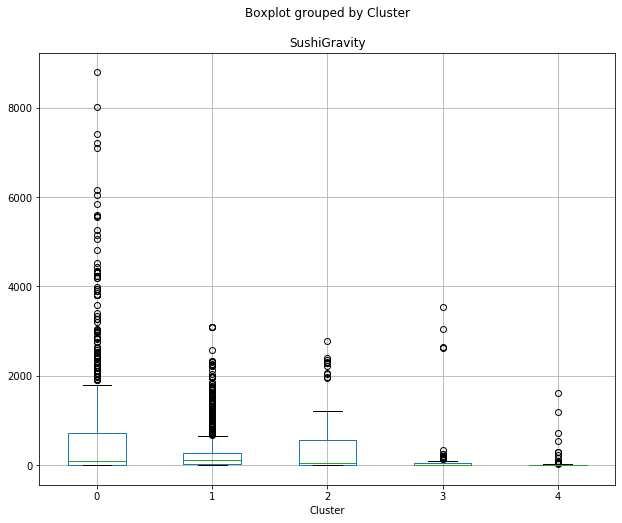

In [97]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['SushiGravity'], by='Cluster', ax=ax)

It can clearly be seen that cluster 0, our "lefty" cluster, as higher levels of access to Sushi places. now lets inspect access to Falafel:

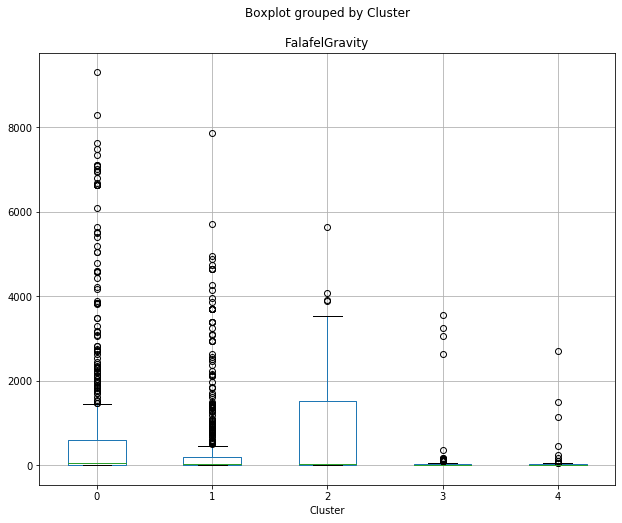

In [98]:

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['FalafelGravity'], by='Cluster', ax=ax)

Results here are much less clear. we see many outliers at the "lefty" cluster. Still, cluster "2" (the "righty" cluster) seems to have the lead in this one.

# 4. Discussion and Concluding Remarks

In this project I've explored ideology viz-a-viz demand for two types of food: one luxurious and the other one basic. Findings suggest that Sushi in deed is associated with leftwing opinions whereas Falafel is associated with right wing opinions.
In addition, we have cluster Israeli statistical areas (~neighborhoods) by the elections at the poles using the latest 2019 data. This clustering by itself reveals an interesting agglomerations of ideologies across space in Israel. The ability to intuitively interpret the clustering results increases, in my view, the reliability of this simple procedure.       
The tools that were used in this project include, among others, k-means clustering, folium maps, logit regression and data retrieval from Foursquare using an API.  I further developed for this project a function that converts ITM coordinates to the global system.   


Thank you!

Roni Golan